In [3]:
# multivariate output 1d cnn example
import tf as tf
from numpy import array
import tensorflow as tf
import numpy as np
import pandas as pd
from numpy import hstack
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, LSTM, LeakyReLU
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D, Conv2D
from keras.layers.convolutional import MaxPooling1D
from keras.preprocessing.sequence import TimeseriesGenerator

import matplotlib.pyplot as plt
# split a multivariate sequence into samples

In [4]:
# Загружаем датафрейм
frame = pd.read_csv('Gosloto_6x45.csv', header=0, sep=';')
frame

# удвляем дату и тираж
frame = frame.drop(columns=['datetime', 'tiraz'], axis=1).astype(float)
frame

,number1,2-number,3-number,4-number,5-number,6-number
0,15.0,17.0,22.0,23.0,25.0,33.0
1,23.0,29.0,44.0,19.0,24.0,45.0
2,38.0,7.0,3.0,45.0,26.0,4.0
3,31.0,26.0,44.0,37.0,40.0,27.0
4,16.0,17.0,12.0,21.0,23.0,35.0
...,...,...,...,...,...,...
5424,18.0,7.0,16.0,23.0,37.0,43.0
5425,15.0,13.0,35.0,33.0,34.0,28.0
5426,27.0,44.0,40.0,29.0,41.0,25.0
5427,1.0,10.0,33.0,37.0,40.0,44.0


In [5]:
in_seq1 = frame["number1"].to_numpy()
in_seq2 = frame["2-number"].to_numpy()
in_seq3 = frame["3-number"].to_numpy()
in_seq4 = frame["4-number"].to_numpy()
in_seq5 = frame["5-number"].to_numpy()
in_seq6 = frame["6-number"].to_numpy()

in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
in_seq4 = in_seq4.reshape((len(in_seq4), 1))
in_seq5 = in_seq5.reshape((len(in_seq5), 1))
in_seq6 = in_seq6.reshape((len(in_seq6), 1))
# horizontally stack columns
dataset_new = hstack((in_seq1, in_seq2, in_seq3, in_seq4, in_seq5, in_seq6))
#dataset= np.array(range(0,54,1)).reshape(9,6)

In [6]:
validat_x = dataset_new[-401:-1]
validat_y = dataset_new[-1:]

In [7]:
# нужно вычесть 5429+validat_x[!это!:]
dataset = dataset_new[:5028]


In [8]:
n_input = 400
generator = TimeseriesGenerator(dataset, dataset, length=n_input, batch_size=80)

#np.delete(validat)

# for i in range(len(generator)):
# 	x_g, y_g = generator[i]
# 	print('%s => %s' % (x_g, y_g))
# generator.length

In [129]:
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	print(len(sequences))
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences)-1:
			print('!')
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
# choose a number of time steps
n_steps = 6
# convert into input/output
X, y = split_sequences(dataset, n_steps)

5028
!


In [9]:
x_val1 = array([[[36 ,37, 38, 39, 40, 41], [42, 43, 44, 45, 46, 47], [48, 49, 50, 51, 52, 53]]])
y_val1 = array( [[54, 55, 56, 57, 58, 59]])

x_val = array([validat_x])
y_val = array( validat_y)
print (x_val)
print (y_val)
print (x_val1)
print (y_val1)

[[[ 8. 33. 32. 30. 31. 44.]
  [25. 19. 29. 31. 33. 26.]
  [40. 16. 26. 23. 27. 30.]
  ...
  [15. 13. 35. 33. 34. 28.]
  [27. 44. 40. 29. 41. 25.]
  [ 1. 10. 33. 37. 40. 44.]]]
[[24. 33. 45. 37. 38.  5.]]
[[[36 37 38 39 40 41]
  [42 43 44 45 46 47]
  [48 49 50 51 52 53]]]
[[54 55 56 57 58 59]]


In [21]:
# the dataset knows the number of features, e.g. 2
#n_features = X.shape[2]
n_features = 6
# define model
model = Sequential()
model.add(Conv1D(filters=1045, kernel_size=60, activation='relu', input_shape=(400, n_features)))
#model.add(BatchNormalization())
#model.add(Conv1D(filters=64, kernel_size=45, activation='relu', input_shape=(395, 64)))
#model.add(MaxPooling1D(pool_size=4))
#model.add(LSTM(25))
model.add(LeakyReLU())
model.add(Flatten())
model.add(Dense(200, activation='linear'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
# fit model
#model.fit(X, y, epochs=3, verbose=1)
callbacks = [
  # Остановить обучение если `val_loss` перестанет улучшаться в течение 2 эпох
  tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss'),
  # Записать логи TensorBoard в каталог `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='./logs')
]
history = model.fit_generator(generator, epochs=150, verbose=2, validation_data=(generator))#, callbacks=callbacks)
print("Ok!")
# demonstrate prediction

Epoch 1/150
58/58 - 98s - loss: 1286860.7500 - val_loss: 172.7437
Epoch 2/150
58/58 - 104s - loss: 173.2757 - val_loss: 174.8228
Epoch 3/150
58/58 - 105s - loss: 172.7532 - val_loss: 170.8277
Epoch 4/150
58/58 - 106s - loss: 172.5882 - val_loss: 169.3786
Epoch 5/150
58/58 - 110s - loss: 174.3152 - val_loss: 172.0888
Epoch 6/150
58/58 - 104s - loss: 173.2493 - val_loss: 171.0731
Epoch 7/150
58/58 - 104s - loss: 171.1056 - val_loss: 175.7711
Epoch 8/150
58/58 - 100s - loss: 178.4313 - val_loss: 173.9443
Epoch 9/150
58/58 - 104s - loss: 170.0593 - val_loss: 165.3134
Epoch 10/150
58/58 - 100s - loss: 170.7309 - val_loss: 165.3538
Epoch 11/150
58/58 - 100s - loss: 172.1399 - val_loss: 167.7204
Epoch 12/150
58/58 - 101s - loss: 171.5206 - val_loss: 164.5005
Epoch 13/150
58/58 - 104s - loss: 170.2172 - val_loss: 178.3883
Epoch 14/150
58/58 - 115s - loss: 169.3319 - val_loss: 163.6149
Epoch 15/150
58/58 - 107s - loss: 165.1428 - val_loss: 162.2894
Epoch 16/150
58/58 - 114s - loss: 165.7325 - v

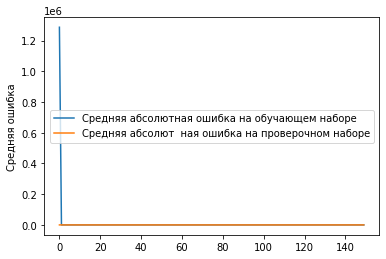

In [22]:
plt.plot(history.history['loss'],
         label='Средняя абсолютная ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Средняя абсолют  ная ошибка на проверочном наборе')
plt.ylabel('Средняя ошибка')
plt.legend()
plt.show()

In [23]:
# x_input = array([[70,71,72,73,74,75], [76,77,78,79,80,81], [82,83,84,85,86,87]])
# x_input = x_input.reshape((1, 3, n_features))
x_input = array([dataset_new[-401:-1]])
yhat = model.predict(x_input, verbose=0)
print(yhat)
print(y_val)
print(x_input)
print (dataset_new[-401])
print (dataset_new[-1])
print(y_val-yhat)


[[27.77262  21.799314 17.548515 18.962217 30.750412 20.74894 ]]
[[24. 33. 45. 37. 38.  5.]]
[[[ 8. 33. 32. 30. 31. 44.]
  [25. 19. 29. 31. 33. 26.]
  [40. 16. 26. 23. 27. 30.]
  ...
  [15. 13. 35. 33. 34. 28.]
  [27. 44. 40. 29. 41. 25.]
  [ 1. 10. 33. 37. 40. 44.]]]
[ 8. 33. 32. 30. 31. 44.]
[24. 33. 45. 37. 38.  5.]
[[ -3.77261925  11.2006855   27.45148468  18.03778267   7.24958801
  -15.74893951]]
